In [87]:
# import dependencies
%matplotlib inline
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# read in csv as pandas dataframe
df = pd.read_csv(Path('../model-selection/neural-network/outliers_removed_sal-era-so.csv'))
df.head()

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started
0,1990,AbbottJim,23,185000,5,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33
1,1990,AbbottPaul,23,100000,6,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7
2,1990,AldredScott,22,100000,4,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3
3,1990,AndersonAllan,26,300000,5,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31
4,1990,AppierKevin,23,100000,3,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24


In [58]:
df=df.rename(columns={'Earned Runs':'ER','Strike Outs':'SO','Home Runs':'HR','Outs Pitched':'OP','Batters Faced by Pitcher':'BFP','Games Finished':'GF','Games Started':'GS'})
df.head()

,Year,Full Name,Age,Salary,ERA,Hits,ER,SO,HR,Wins,Losses,OP,BFP,GF,Weight,Height,League,Team,GS
0,1990,AbbottJim,23,185000,5,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33
1,1990,AbbottPaul,23,100000,6,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7
2,1990,AldredScott,22,100000,4,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3
3,1990,AndersonAllan,26,300000,5,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31
4,1990,AppierKevin,23,100000,3,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24


In [83]:
# export as csv for later use
df.to_csv('outliers-removed_spaces-removed.csv', index=False)

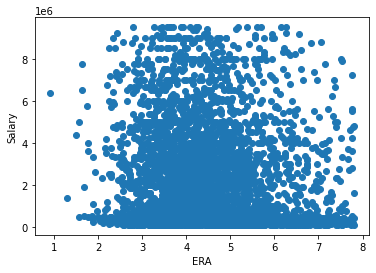

In [27]:
# visually inspect relationship between yrs ERA and salary
plt.scatter(df.ERA, df.Salary)
plt.xlabel('ERA')
plt.ylabel('Salary')
plt.show()

In [28]:
# format data to meet requirements of SciKit-learn library
X=df.ERA.values.reshape(-1,1)
X.shape

In [30]:
# set target variable
y=df['Salary']
y.shape

(4349,)

In [31]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [32]:
# create instance of linear regression model
model=LinearRegression()

In [33]:
# fitting /training/modeling
model.fit(X,y)
model

LinearRegression()

In [34]:
# Print the coefficient and the intercept for the model.

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [-214055.77422057]
y-axis intercept:  2952487.630178809


In [35]:
# Note: We have to transform our min and max values 
# so they are in the format of array([[0.4999]]).
# This is the required format for `model.predict()`.

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.9]]
Max X Value: [[7.81]]


In [36]:
# Calculate the y_min and y_max by using model.predict and x_min and x_max.

y_min = model.predict(x_min)
y_max = model.predict(x_max)

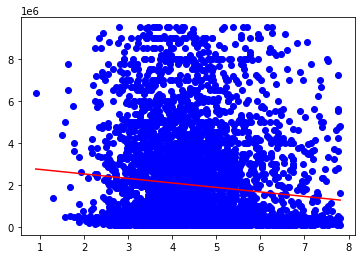

In [37]:
# Plot X and y by using plt.scatter.
# Plot the model fit line by using [x_min[0], x_max[0]], [y_min[0], y_max[0]].

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [38]:
# generate predictions
y_pred=model.predict(X)
print(y_pred.shape)

(4349,)


In [79]:
pd.options.display.float_format='{:,.0f}'.format

In [40]:
y_pred = model.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,"1,591,093",426000
1,"2,100,546",2200000
2,"2,051,313",502500
3,"1,768,759",160000
4,"1,321,383",300000


In [41]:
pct_error= (((y_test-y_pred)/y_test)*100)

In [42]:
y_pred = model.predict(X_test)
results_df=pd.DataFrame({"Predicted": y_pred, "Actual": y_test, "Percent Error": pct_error})[["Predicted", "Actual", "Percent Error"]]
results_df.abs()

,Predicted,Actual,Percent Error
3392,"1,591,093",426000,273
2878,"2,100,546",2200000,5
3802,"2,051,313",502500,308
1206,"1,768,759",160000,"1,005"
932,"1,321,383",300000,340
...,...,...,...
2459,"1,640,326",300000,447
473,"1,524,736",525000,190
89,"2,250,385",415000,442
850,"1,481,924",335000,342


In [84]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score*100:.2f}%")
print(f"Testing Score: {testing_score*100:.2f}%")

Training Score: 5.73%
Testing Score: 8.43%


In [102]:
# Score the prediction with MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean squared error (MSE): {mse:.2f}")
print(f"R-squared (R2 ): {r2:.2f}")

mean squared error (MSE): 4760823212529.85
R-squared (R2 ): 0.09
